In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../db/flights_2008.csv")

# Route: Origin -> Dest
df["Route"] = df["Origin"].astype(str) + "->" + df["Dest"].astype(str)

# DepHour: час вылета из DepTime (формат HHMM)
df["DepHour"] = ((df["DepTime"] - 1) // 100).astype("Int64")

# Отдельные выборки для completed и cancelled
completed = df[df["Cancelled"] == 0].copy()
cancelled = df[df["Cancelled"] == 1].copy()

Consider the following terms we use:
* unique flight – a record (row) in the dataset
* completed flight – flight that is not cancelled (Cancelled==0 in the dataset)
* flight code – a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code – a three letter airport alias from 'Origin' or 'Dest' columns

**Check the number of rows and columns and print column names.**

In [2]:
print(df.shape)
print(df.columns)

(7009728, 31)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Route', 'DepHour'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Route,DepHour
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IAD->TPA,20
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IAD->TPA,7
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IND->BWI,6
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IND->BWI,9
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,NaN,0,2.0,0.0,0.0,0.0,32.0,IND->BWI,18


**Transpose the frame to see all features at once.**

In [4]:
# Транспонирование первых 5 строк — все признаки в одном view
df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0
CRSDepTime,1955,735,620,930,1755
ArrTime,2211.0,1002.0,804.0,1054.0,1959.0
CRSArrTime,2225,1000,750,1100,1925
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920


**Examine data types of all features and total dataframe size in memory.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

**Get basic statistics of each feature.**

In [6]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,6873482.0
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01,13.01424
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01,4.792586
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.0
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,13.0
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01,17.0
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,23.0


**Count unique Carriers and plot their relative share of flights:**

In [7]:
df['UniqueCarrier'].nunique()

20

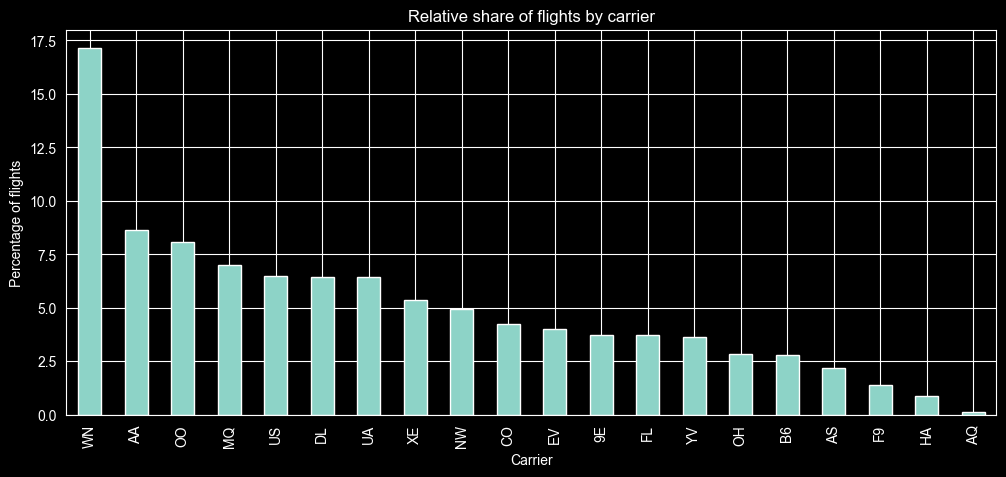

In [8]:
carrier_share = df['UniqueCarrier'].value_counts(normalize=True) * 100

carrier_share.plot(kind='bar', figsize=(12, 5))
plt.ylabel('Percentage of flights')
plt.xlabel('Carrier')
plt.title('Relative share of flights by carrier')
plt.show()

**Number of flights by days of week and by month:**

In [9]:
# По дням недели (1=Mon, 7=Sun)
df['DayOfWeek'].value_counts().sort_index()

DayOfWeek
1    1036201
2    1032049
3    1039665
4    1032224
5    1035166
6     857536
7     976887
Name: count, dtype: int64

In [10]:
# По месяцам (1-12)
df['Month'].value_counts().sort_index()

Month
1     605765
2     569236
3     616090
4     598126
5     606293
6     608665
7     627931
8     612279
9     540908
10    556205
11    523272
12    544958
Name: count, dtype: int64

**How many unique carriers are there in our dataset?**

In [11]:
df['UniqueCarrier'].nunique()

20

**We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference?**

In [12]:
df['Cancelled'].value_counts()

Cancelled
0    6872294
1     137434
Name: count, dtype: int64

In [13]:
df['Cancelled'].value_counts(normalize=True) * 100

Cancelled
0    98.039382
1     1.960618
Name: proportion, dtype: float64

**Find a flight with the longest departure delay and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

In [14]:
max_dep_row = completed.loc[completed['DepDelay'].idxmax()]
max_dep_row

Year                     2008
Month                       4
DayofMonth                 10
DayOfWeek                   4
DepTime                 724.0
CRSDepTime               1417
ArrTime                 858.0
CRSArrTime               1605
UniqueCarrier              NW
FlightNum                1699
TailNum                N3324L
ActualElapsedTime       154.0
CRSElapsedTime          168.0
AirTime                 132.0
ArrDelay               2453.0
DepDelay               2467.0
Origin                    CLT
Dest                      MSP
Distance                  930
TaxiIn                    8.0
TaxiOut                  14.0
Cancelled                   0
CancellationCode          NaN
Diverted                    0
CarrierDelay           2436.0
WeatherDelay              0.0
NASDelay                  0.0
SecurityDelay             0.0
LateAircraftDelay        17.0
Route                CLT->MSP
DepHour                     7
Name: 2235378, dtype: object

In [15]:
max_arr_row = completed.loc[completed['ArrDelay'].idxmax()]
max_arr_row

Year                     2008
Month                       2
DayofMonth                  3
DayOfWeek                   7
DepTime                1117.0
CRSDepTime               1820
ArrTime                2256.0
CRSArrTime                555
UniqueCarrier              NW
FlightNum                 808
TailNum                N817NW
ActualElapsedTime       459.0
CRSElapsedTime          455.0
AirTime                 437.0
ArrDelay               2461.0
DepDelay               2457.0
Origin                    HNL
Dest                      MSP
Distance                 3972
TaxiIn                    6.0
TaxiOut                  16.0
Cancelled                   0
CancellationCode          NaN
Diverted                    0
CarrierDelay           1455.0
WeatherDelay              0.0
NASDelay                  4.0
SecurityDelay             0.0
LateAircraftDelay      1002.0
Route                HNL->MSP
DepHour                    11
Name: 1018798, dtype: object

In [16]:
if max_dep_row['Dest'] == max_arr_row['Dest']:
    print('Yes, they have the same destination airport')
    print('Destination airport code:', max_arr_row['Dest'])
else:
    print('No, they do not have the same destination airport')

Yes, they have the same destination airport
Destination airport code: MSP


**Find the carrier that has the greatest number of cancelled flights.**

In [17]:
carrier_most_cancelled = df.groupby('UniqueCarrier')['Cancelled'].sum().idxmax()
print('Carrier with most cancellations:', carrier_most_cancelled)
df.groupby('UniqueCarrier')['Cancelled'].sum().sort_values(ascending=False).head(1)

UniqueCarrier
MQ    18331
Name: Cancelled, dtype: int64

**Let's examine departure time and consider distribution by hour (column `DepHour` that we've created earlier). Which hour has the highest percentage of flights?**<br>

*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).


In [18]:
# Completed flights: час с наибольшим % вылетов
completed_with_hour = completed.dropna(subset=['DepTime', 'DepDelay'])
(completed_with_hour['DepHour'].value_counts(normalize=True) * 100).sort_values(ascending=False).head(1).round(2)

DepHour
8    6.55
Name: proportion, dtype: Float64

**OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>


In [19]:
cancelled_with_hour = cancelled.dropna(subset=['DepTime'])
(cancelled_with_hour['DepHour'].value_counts(normalize=True) * 100).sort_values().head(1).round(2)

DepHour
2    0.08
Name: proportion, dtype: Float64

**Is there any hour that didn't have any cancelled flights at all? Check all that apply.**


In [20]:
all_hours = set(df['DepHour'].dropna().unique())
cancelled_hours = set(cancelled['DepHour'].dropna().unique())
hours_with_no_cancellations = sorted(all_hours - cancelled_hours)
print('Hours with no cancelled flights:', hours_with_no_cancellations)

Hours with no cancelled flights: [np.int64(3)]


Answer: Yes, hour 3 had no cancelled flights at all.

**Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*Hint:* Consider only *completed* flights.


In [21]:
# Самый загруженный час (completed flights)
busiest_hour = completed['DepHour'].value_counts().idxmax()
busiest_count = completed['DepHour'].value_counts().max()
print(f'Busiest hour: {busiest_hour} ({busiest_count} flights)')

In [22]:
# Альтернативно: топ по количеству
completed['DepHour'].value_counts(sort=True).head(1)

DepHour
8    450202
Name: count, dtype: Int64

**Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.



In [23]:
avg_dep_delay_by_hour = (
    completed.dropna(subset=['DepDelay', 'DepHour'])
    .groupby('DepHour')['DepDelay']
    .mean().sort_values()
)
avg_dep_delay_by_hour

DepHour
5      -3.979539
6      -1.597697
7       0.146922
8       1.814108
4       2.435394
9       3.775744
10      5.493609
11      6.723591
12      7.914495
13      8.884021
14     10.295545
16     11.885095
15     11.932553
17     13.300341
18     15.343630
19     16.977981
20     22.833736
21     23.233856
22     38.400352
23     60.165895
0      70.982600
3      93.554374
1     113.165294
2     121.113029
Name: DepDelay, dtype: float64

In [24]:
early_hours = avg_dep_delay_by_hour[avg_dep_delay_by_hour < 0]
early_hours

DepHour
5   -3.979539
6   -1.597697
Name: DepDelay, dtype: float64

**Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>


In [25]:
# Распределение completed рейсов по часу вылета
hour_dist = completed['DepHour'].value_counts().sort_index()
peak_hour = hour_dist.idxmax()
print(f"Peak departure hour: {peak_hour} ({hour_dist.max()} flights)")
# hour_dist

Peak departure hour: 8 (450202 flights)


**Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**


In [26]:
completed['UniqueCarrier'].value_counts(sort=True).head(10)

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: count, dtype: int64

**Plot distributions of flight cancellation reasons (CancellationCode).**

**What is the most frequent reason for flight cancellation?**

In [27]:
cancel_reasons = cancelled['CancellationCode'].value_counts()
print('Most frequent reason:', cancel_reasons.idxmax())

Most frequent reason: B


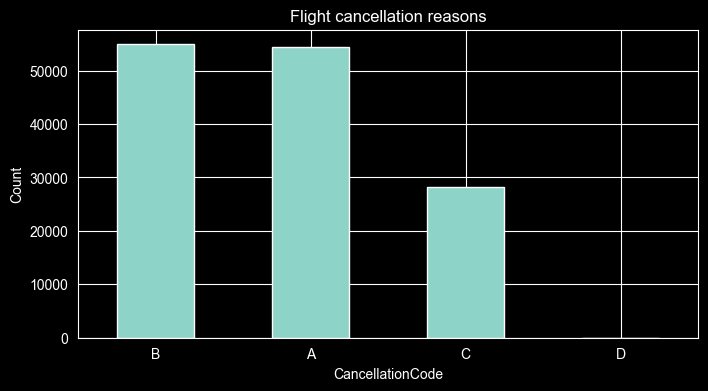

In [28]:
cancel_reasons = cancelled['CancellationCode'].value_counts()
cancel_reasons.plot(kind='bar', figsize=(8, 4), title='Flight cancellation reasons')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 


In [29]:
df['Route'].value_counts().head(1)

Route
SFO->LAX    13788
Name: count, dtype: int64

**Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_ : consider only positive delays


In [30]:
delayed = df[df['DepDelay'] > 0]
top5_routes = delayed.groupby('Route').size().sort_values(ascending=False).head(5)
top5_route_names = top5_routes.index.tolist()
print('Top-5 delayed routes:'); print(top5_routes)
flights_top5 = df[df['Route'].isin(top5_route_names)]
weather_count = (flights_top5['WeatherDelay'] > 0).sum()
print(f'\nFlights with weather delay on these 5 routes: {weather_count}')

Top-5 delayed routes:
Route
LAX->SFO    6253
DAL->HOU    5742
SFO->LAX    5322
ORD->LGA    5311
HOU->DAL    5288
dtype: int64

Flights with weather delay on these 5 routes: 668


**Examine the hourly distribution of departure times.**



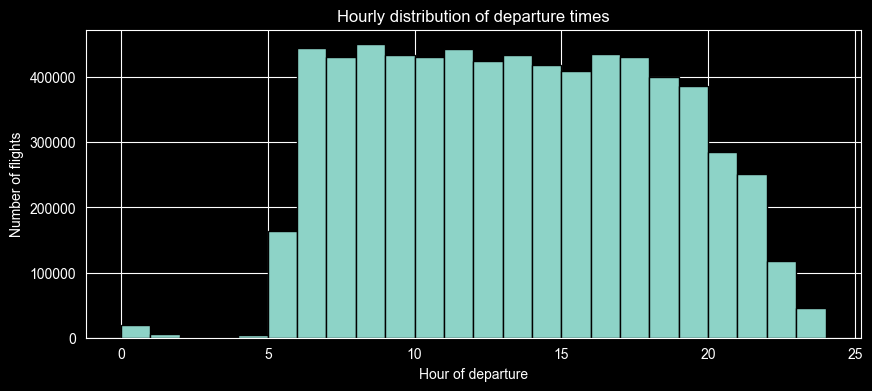

In [31]:
df['DepHour'].dropna().astype(int).hist(bins=24, range=(0, 24), edgecolor='black', figsize=(10, 4))
plt.xlabel('Hour of departure')
plt.ylabel('Number of flights')
plt.title('Hourly distribution of departure times')
plt.show()

**Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**


**Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**


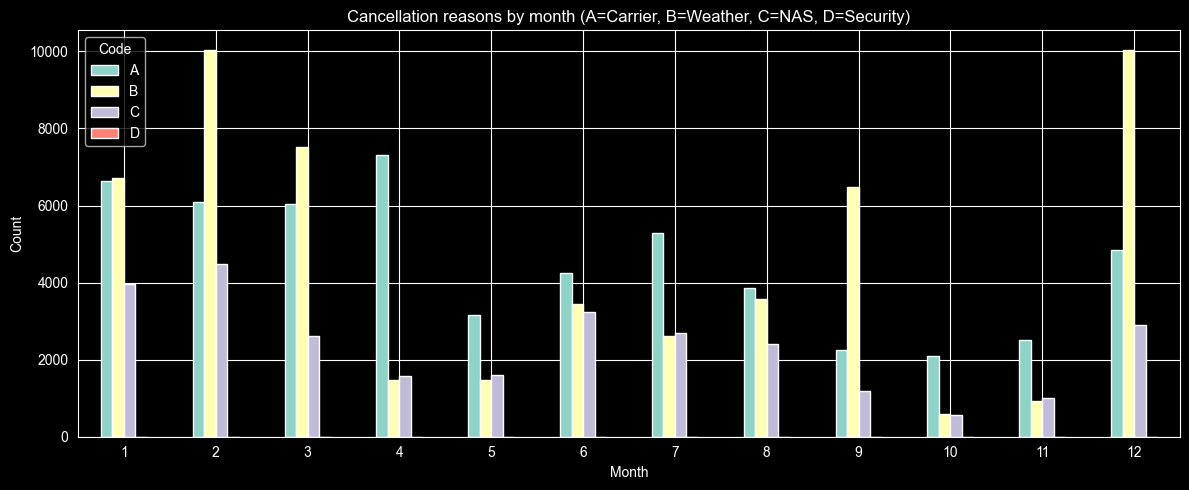

In [34]:
cancel_by_month = cancelled.groupby(['Month', 'CancellationCode']).size().unstack(fill_value=0)
cancel_by_month.plot(kind='bar', stacked=False, figsize=(12, 5))
plt.title('Cancellation reasons by month (A=Carrier, B=Weather, C=NAS, D=Security)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Code')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Which month has the greatest number of cancellations due to Carrier?** 


In [35]:
carrier_cancelled = cancelled[cancelled['CancellationCode'] == 'A']
month_most_carrier = carrier_cancelled.groupby('Month').size().idxmax()
print(f'Month with most carrier cancellations: {month_most_carrier}')

Month with most carrier cancellations: 4


**Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**


In [36]:
carrier_in_month = carrier_cancelled[carrier_cancelled['Month'] == month_most_carrier]
carrier_most = carrier_in_month['UniqueCarrier'].value_counts().idxmax()
print(f'Carrier with most cancellations due to carrier in month {month_most_carrier}: {carrier_most}')

Carrier with most cancellations due to carrier in month 4: AA


**Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

In [37]:
delays = completed[['UniqueCarrier', 'ArrDelay', 'DepDelay']].copy()
delays = delays[(delays['ArrDelay'] >= 0) & (delays['DepDelay'] >= 0)]
p95_arr = delays['ArrDelay'].quantile(0.95)
p95_dep = delays['DepDelay'].quantile(0.95)
delays = delays[(delays['ArrDelay'] <= p95_arr) & (delays['DepDelay'] <= p95_dep)]
medians = delays.groupby('UniqueCarrier')[['ArrDelay', 'DepDelay']].median()
medians['Max'] = medians.max(axis=1)
best = medians['Max'].idxmin()
print(f'Carrier with lowest median for both: {best}')
print(medians.loc[best])

Carrier with lowest median for both: AQ
ArrDelay    6.0
DepDelay    5.0
Max         6.0
Name: AQ, dtype: float64


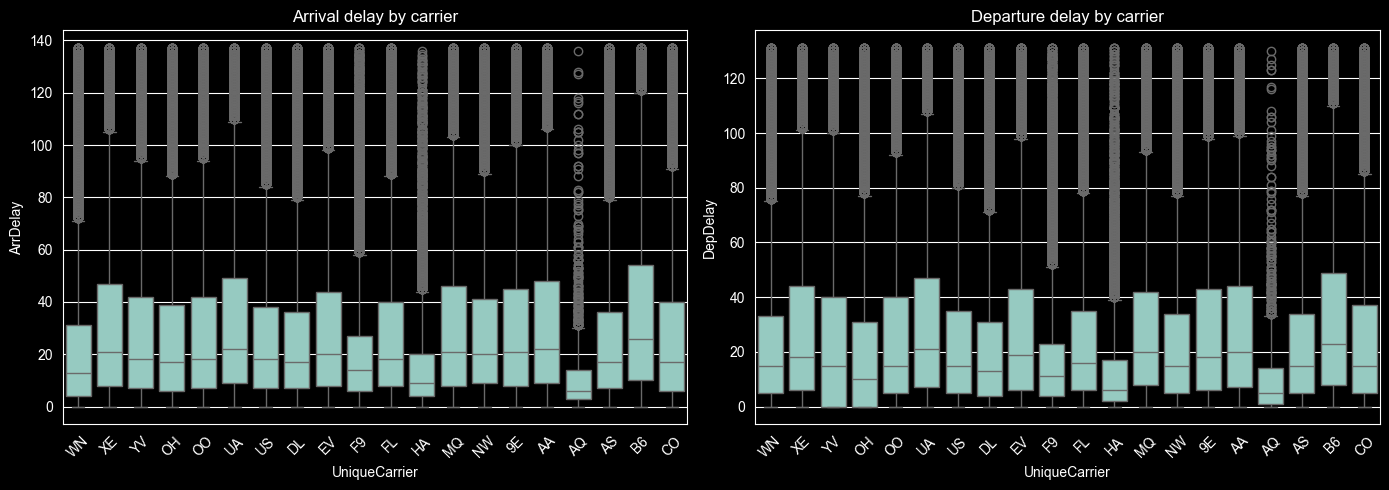

In [38]:
delays = completed[['UniqueCarrier', 'ArrDelay', 'DepDelay']].copy()
delays = delays[(delays['ArrDelay'] >= 0) & (delays['DepDelay'] >= 0)]
p95_arr = delays['ArrDelay'].quantile(0.95)
p95_dep = delays['DepDelay'].quantile(0.95)
delays = delays[(delays['ArrDelay'] <= p95_arr) & (delays['DepDelay'] <= p95_dep)]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=delays, x='UniqueCarrier', y='ArrDelay', ax=axes[0])
axes[0].set_title('Arrival delay by carrier')
axes[0].tick_params(axis='x', rotation=45)
sns.boxplot(data=delays, x='UniqueCarrier', y='DepDelay', ax=axes[1])
axes[1].set_title('Departure delay by carrier')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()